# Импорт бибилиотек и необходимые функции 

In [ ]:
import os
# полный путь к корню директории для запуска 
os.chdir('E:/GitHubProjects/autolabeling_time_series_data/')

from src.generation.ts_generators import *  
from src.generation.ts_noise_generators import normal_noise  
from src.generation.ts_creation import *
from src.utils import plot_series

In [66]:
# функции трендов
def linear_generator(n_cluster:int=2, length:int=100, param_name:str='slope'):
    """
    Функция-генератор для линейного тренда с изменением кол-ва кластеров 
    """
    generator = TS_generator(linear_trend, 'configs/trends/basic_linear_trend.yaml')
    generator.config[f'{param_name}_q'] = n_cluster
    generator.config['length'] = length + 1

    return generator

def quad_generator(n_cluster:int=2, length:int=100, param_name:str='a'):
    """
    Функция-генератор для линейного тренда с изменением кол-ва кластеров 
    """
    generator = TS_generator(quad_generator, 'configs/trends/basic_quadratic_trend.yaml')
    generator.config[f'{param_name}_q'] = n_cluster
    generator.config['length'] = length + 1

    return generator

def exp_generator(n_cluster:int=2, length:int=100, param_name:str='alpha'):
    """
    Функция-генератор для линейного тренда с изменением кол-ва кластеров 
    """
    generator = TS_generator(exponential_trend, 'configs/trends/basic_exponential_trend.yaml')
    generator.config[f'{param_name}_q'] = n_cluster
    generator.config['length'] = length + 1

    return generator

# функции сезонности
def sin_wave_generator(n_cluster:int=2, length:int=100, param_name:str='frequency'):
    """
    Функция-генератор для линейного тренда с изменением кол-ва кластеров 
    """
    generator = TS_generator(sin_wave, 'configs/seasonality/basic_sin_wave.yaml')
    generator.config[f'{param_name}_q'] = n_cluster
    generator.config['length'] = length + 1

    return generator
    

# функции сдвигов


# функция шума

def apply_noise(rows:Any, noise_int:int, freq:int=100):
    """
    Функция создает генератор шума
    """
    noise_gen = Noise_generator(rows, normal_noise, 'configs/noise/basic_normal_noise.yaml')
    noise_gen.generate_params()
    noise_gen.config['noise_pct_d'] = noise_int[0]
    noise_gen.config['noise_pct_u'] = noise_int[1]
    noise_gen.config['noise_pct_q'] = int(freq / 10)
    return noise_gen


In [ ]:
def create_dist_params(config_path:str, return_generator:bool = True):
    """
    Функция генерирует сетку параметров для тестирования на синтетических данных согласно таблице 7 раздела 3.3
    """
    params = load_config_file(config_path)    

    # Генерация всех комбинаций
    param_grid = ParameterGrid(params)

    if return_generator:
        return param_grid

    return [grid for grid in param_grid]


def apply_scale(rows:Any, scale:Tuple[float, float]):
    """
    Нормирует все функции в этом диапазоне
    """
    if not isinstance(rows, np.ndarray):
        rows = np.asarray(rows)
    
    min_val, max_val = rows.min(), rows.max()
    
    return np.asarray([scale[0] + (row - min_val) * (scale[1] - scale[0]) / (max_val - min_val) for row in rows]) 


def generate_label(label):
    """
    
    """
    return '_'.join(label[0])


def get_labels(labels):
    """
    
    """
    le = LabelEncoder()
    labels_encoded = le.fit_transform(labels)
    
    return labels_encoded


def create_dist(ts_gen:TS_generator, params: dict, show_pic:bool=False):
    """
    Генерация датасетов с помощью  
    """
    rows,_ = ts_gen.generate()
    noise_gen = apply_noise(rows, params['noise_level'], params['sample_size']) 
    
    dist_gen = TS_merger()
    
    sample = []
    labels = []
    for _ in range(params['sample_size']):
        block1 = TS_block(trend=ts_gen, noise=noise_gen, length=params['ts_length'])
        dist_gen.add_block(block1)
        generation_res = dist_gen.generate()
        dist_gen.remove_block(0)
    
        sample.append(generation_res[0])
        labels.append(generate_label(generation_res[1]))
    
    sample_scaled = apply_scale(sample, params['value_scale'])
    labels_encoded = get_labels(labels)
    
    if show_pic:
        plot_series([series for series in sample_scaled], show_legend=False)

    return sample_scaled, labels_encoded

def sample_stats(X,y):
    print(X.shape)
    values, counts = np.unique(y, return_counts=True)
    frequencies = counts / len(y)
    for value, freq in zip(values, frequencies):
        print(f"{value} - {freq:.2f}")

# Реализация 

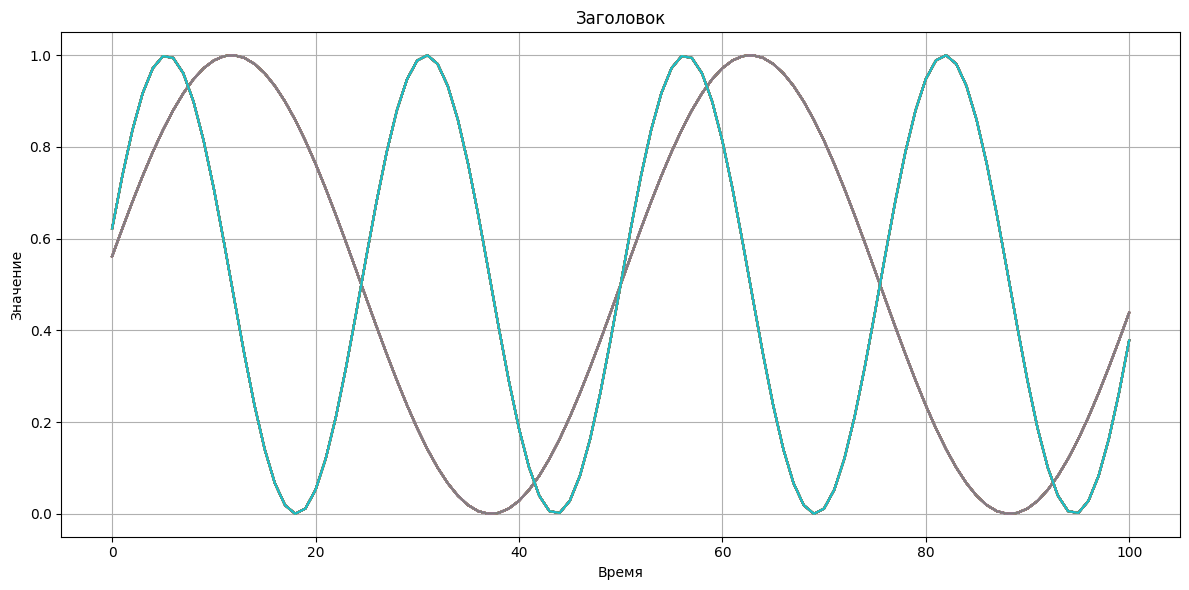

(50, 101)
0 - 0.52
1 - 0.48


In [68]:
params_grid = {
    'noise_level': [0, 0],
    'sample_size': 50,
    'shifts': 0,
    'ts_length': 100,
    'value_scale': [0, 1]
}

generator = sin_wave_generator(2, 101)
sample1, labels1 = create_dist(generator, params_grid, True)
sample_stats(sample1, labels1)

In [4]:
synth_grid = create_dist_params('configs/conditions/characteristic_grid.yaml', False)
synth_grid

[{'noise_level': [0, 0],
  'sample_size': 50,
  'shifts': 0,
  'ts_length': 100,
  'value_scale': [0, 1]},
 {'noise_level': [0, 0],
  'sample_size': 50,
  'shifts': 0,
  'ts_length': 100,
  'value_scale': [100, 800]},
 {'noise_level': [0, 0],
  'sample_size': 50,
  'shifts': 0,
  'ts_length': 100,
  'value_scale': [1000, 9000]},
 {'noise_level': [0, 0],
  'sample_size': 50,
  'shifts': 0,
  'ts_length': 500,
  'value_scale': [0, 1]},
 {'noise_level': [0, 0],
  'sample_size': 50,
  'shifts': 0,
  'ts_length': 500,
  'value_scale': [100, 800]},
 {'noise_level': [0, 0],
  'sample_size': 50,
  'shifts': 0,
  'ts_length': 500,
  'value_scale': [1000, 9000]},
 {'noise_level': [0, 0],
  'sample_size': 50,
  'shifts': 0,
  'ts_length': 1000,
  'value_scale': [0, 1]},
 {'noise_level': [0, 0],
  'sample_size': 50,
  'shifts': 0,
  'ts_length': 1000,
  'value_scale': [100, 800]},
 {'noise_level': [0, 0],
  'sample_size': 50,
  'shifts': 0,
  'ts_length': 1000,
  'value_scale': [1000, 9000]},
 {'n

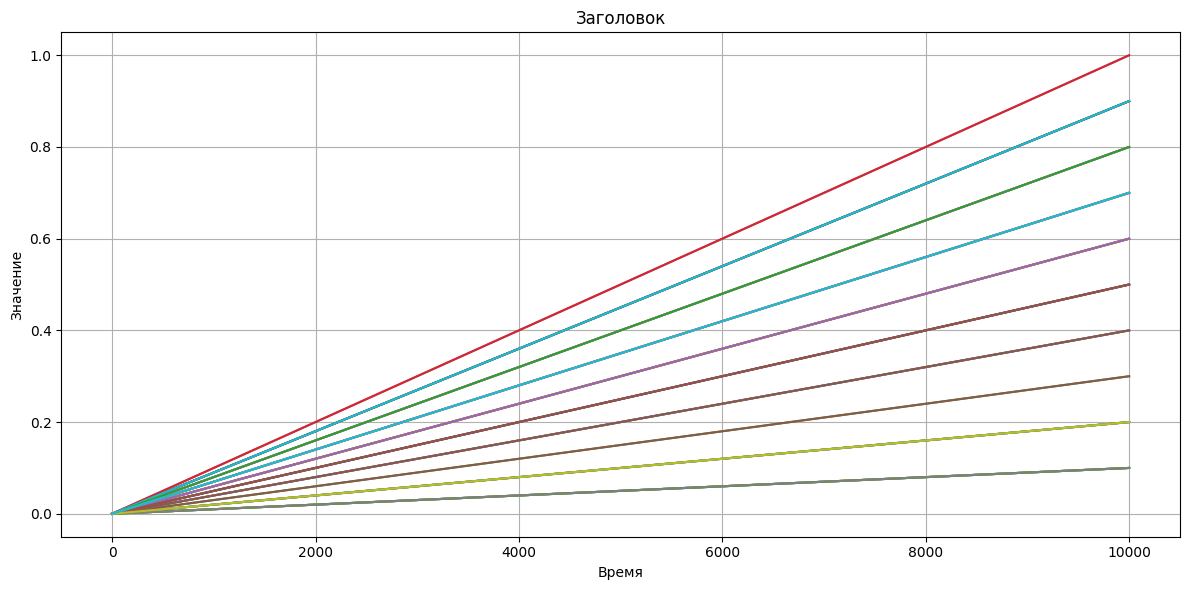

(50, 10000)
0 - 0.14
1 - 0.10
2 - 0.04
3 - 0.08
4 - 0.12
5 - 0.12
6 - 0.16
7 - 0.08
8 - 0.12
9 - 0.04


In [ ]:

def main():
    np.random.seed(21)
    
    dist_config = {
        'noise_level': [0, 0],
        'sample_size': 50, 
        'shifts': 0, 
        'value_scale': [0, 1],
        'ts_length': 10000, 
        'n_clusters': 10
    }

    X_train, y_train = check_work(dist_config, 'slope')
    return X_train, y_train

X_train, y_train = main()

In [47]:
# if __name__ == '__main__':
# 

# synth_grid = create_dist_params('configs/conditions/characteristic_grid.yaml', False)

# линейные тренды 
# for cluster_num in range(2, 11):
#     print(cluster_num) 
# for inx, params in enumerate(synth_grid):
#     lin_gen = update_lin_gen(2, params['ts_length'], False)
#     sample1, labels1 = create_dist(lin_gen, params)
#     res_path=MAIN_PATH / 'linear_datasets' / str(inx) 
    
#     save_config_file(params, res_path/'metadata.yaml')
#     np.save(res_path/ 'data.npy', sample1)
#     np.save(res_path/ 'labels.npy', labels1)

In [40]:
# if __name__ == '__main__':

# 
synth_grid = create_dist_params('configs/conditions/characteristic_grid.yaml', False)

# линейные тренды 
for inx, params in enumerate(synth_grid):
    lin_gen = update_lin_gen(2, params['ts_length'], False)
    sample1, labels1 = create_dist(lin_gen, params)
    # res_path=MAIN_PATH / 'linear_datasets' / str(inx) 
    print(inx, sample1.shape)    
    # save_config_file(params, res_path/'metadata.yaml')
    # np.save(res_path/ 'data.npy', sample1)
    # np.save(res_path/ 'labels.npy', labels1)


0 (50, 100)
1 (50, 100)
2 (50, 100)
3 (50, 500)
4 (50, 500)
5 (50, 500)
6 (50, 1000)
7 (50, 1000)
8 (50, 1000)
9 (50, 10000)
10 (50, 10000)
11 (50, 10000)
12 (50, 100)
13 (50, 100)
14 (50, 100)
15 (50, 500)
16 (50, 500)
17 (50, 500)
18 (50, 1000)
19 (50, 1000)
20 (50, 1000)
21 (50, 10000)
22 (50, 10000)
23 (50, 10000)
24 (200, 100)
25 (200, 100)
26 (200, 100)
27 (200, 500)
28 (200, 500)
29 (200, 500)
30 (200, 1000)
31 (200, 1000)
32 (200, 1000)
33 (200, 10000)
34 (200, 10000)
35 (200, 10000)
36 (200, 100)
37 (200, 100)
38 (200, 100)
39 (200, 500)
40 (200, 500)
41 (200, 500)
42 (200, 1000)
43 (200, 1000)
44 (200, 1000)
45 (200, 10000)
46 (200, 10000)
47 (200, 10000)
48 (800, 100)
49 (800, 100)
50 (800, 100)
51 (800, 500)
52 (800, 500)
53 (800, 500)
54 (800, 1000)
55 (800, 1000)
56 (800, 1000)
57 (800, 10000)
58 (800, 10000)
59 (800, 10000)
60 (800, 100)
61 (800, 100)
62 (800, 100)
63 (800, 500)
64 (800, 500)
65 (800, 500)
66 (800, 1000)
67 (800, 1000)
68 (800, 1000)
69 (800, 10000)
70 (

****************************************************************************************************
0 {'noise_level': [0, 0], 'sample_size': 50, 'shifts': 0, 'ts_length': 100, 'value_scale': [0, 1]}

True
False
False
False
False

[0]
****************************************************************************************************
1 {'noise_level': [0, 0], 'sample_size': 50, 'shifts': 0, 'ts_length': 100, 'value_scale': [100, 800]}

True
False
False
False
False

[0, 1]
****************************************************************************************************
2 {'noise_level': [0, 0], 'sample_size': 50, 'shifts': 0, 'ts_length': 100, 'value_scale': [1000, 9000]}

True
False
False
False
False

[0, 1, 2]
****************************************************************************************************
3 {'noise_level': [0, 0], 'sample_size': 50, 'shifts': 0, 'ts_length': 500, 'value_scale': [0, 1]}

True
False
False
False
False

[0, 1, 2, 3]
********************************

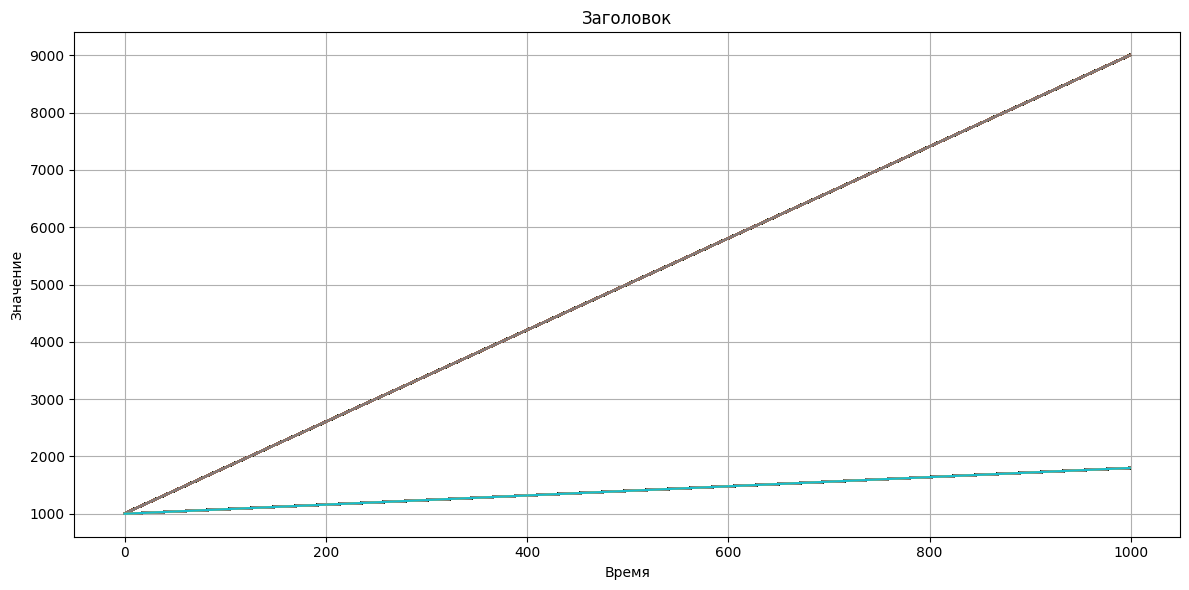

In [5]:
synth_grid = create_dist_params('configs/conditions/characteristic_grid.yaml', False)

def get_dataset_inxs(grid, noise_level=[], sample_size=[], shifts=[], ts_length=[], value_scale=[]):
    """
    """
    inxs = []
    for inx, params in enumerate(grid):
        inx_found = False
        print('*'*100)
        print(inx, params)
        print()
        print(params['noise_level'] in noise_level and not inx_found)
        if params['noise_level'] in noise_level and not inx_found:
            inxs.append(inx)
            inx_found = True
        print(params['sample_size'] in sample_size and not inx_found)
        if params['sample_size'] in sample_size and not inx_found:
            inxs.append(inx)
            inx_found = True
        print(params['shifts'] in shifts and not inx_found)
        if params['shifts'] in shifts and not inx_found:
            inxs.append(inx)
            inx_found = True
        print(params['ts_length'] in ts_length and not inx_found)
        if params['ts_length'] in ts_length and not inx_found:
            inxs.append(inx)
            inx_found = True
        print(params['value_scale'] in value_scale and not inx_found)
        if params['value_scale'] in value_scale and not inx_found:
            inxs.append(inx)
            inx_found = True
        
        print()
        print(inxs)
    
    return inxs

def load_data(inx:int, dir_path:Path=Path('data/Synthetic_data/linear_datasets')):
    X, y, metadata = np.load(dir_path/str(inx)/'data.npy'), np.load(dir_path/str(inx)/'labels.npy'), load_config_file(dir_path/str(inx)/'metadata.yaml')

    return X, y, metadata

res_inxs = get_dataset_inxs(synth_grid, [[0,0]])
# get_dataset_inxs(synth_grid, [[0.1,0.2]], [10000], [1], [10000], [[1000,9000]])

X, y, metadata = load_data(92)
X.shape
plot_series([row for row in X], show_legend=False)

384 {'noise_level': [0.01, 0.05], 'sample_size': 50, 'shifts': 0, 'ts_length': 1000, 'value_scale': [1000, 9000]}


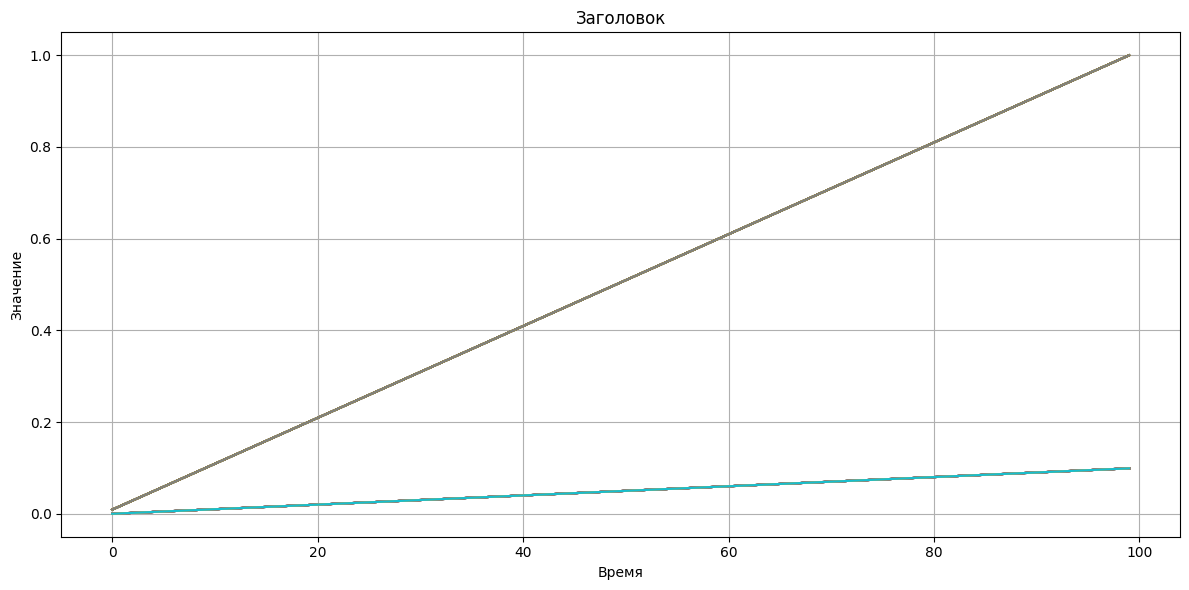

[0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0
 1 1 0 0 0 0 0 0 0 0 1 0 0]


In [ ]:
synth_grid = create_dist_params('configs/conditions/characteristic_grid.yaml', False)
print(len(synth_grid), synth_grid[104])

params = synth_grid[0]
check_rows = [[0,1,2,3,4,5], [5,6,7,8,9,10]]

# apply_scale([100,800], check_rows)

# ns = apply_noise(check_rows, synth_grid[104]['noise_level'], synth_grid[104]['sample_size'])
# print(ns.config)

lin_gen = update_lin_gen(2, params['ts_length'], False)
sample1, labels1 = create_dist(lin_gen, params)

plot_series([ts for ts in sample1], show_legend=False)
print(labels1)

# Реализация поведения

In [ ]:
# поведение #
# смена тренда 
# сезонность поменялась
# подъем и спуск значений / "качели"
# тренд + сезонность
# тренд + сезонность + сдвиги
# тренд + сезонность + сдвиги + шум

# Визуализация распределений

## Linear Trend

5


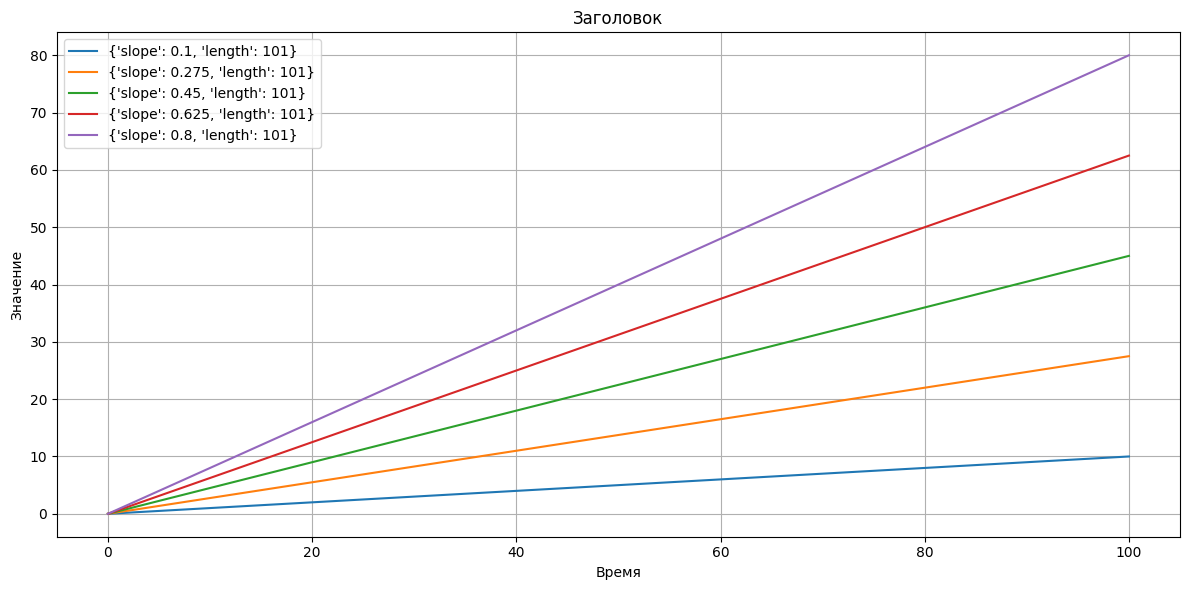

In [40]:
gen_func = TS_generator(linear_trend, 'configs/trends/basic_linear_trend.yaml')
gen_func.config['slope_q'] = 5

series, params = gen_func.generate(all_values=True)
print(len(series))

plot_series(series, labels=params)

## Quadratic Trend

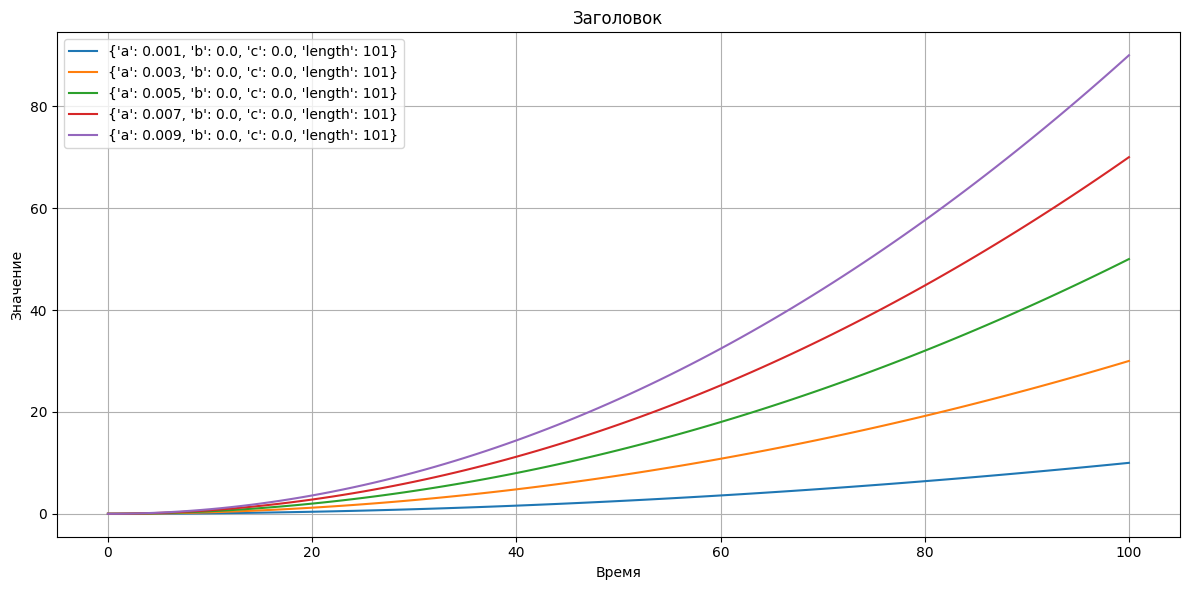

In [32]:
gen_func = TS_generator(quadratic_trend, 'configs/trends/basic_quadratic_trend.yaml')

gen_func.config['a_q'] = 5

series, params = gen_func.generate(all_values=True)
plot_series(series, labels=params)

## Exponential Trend

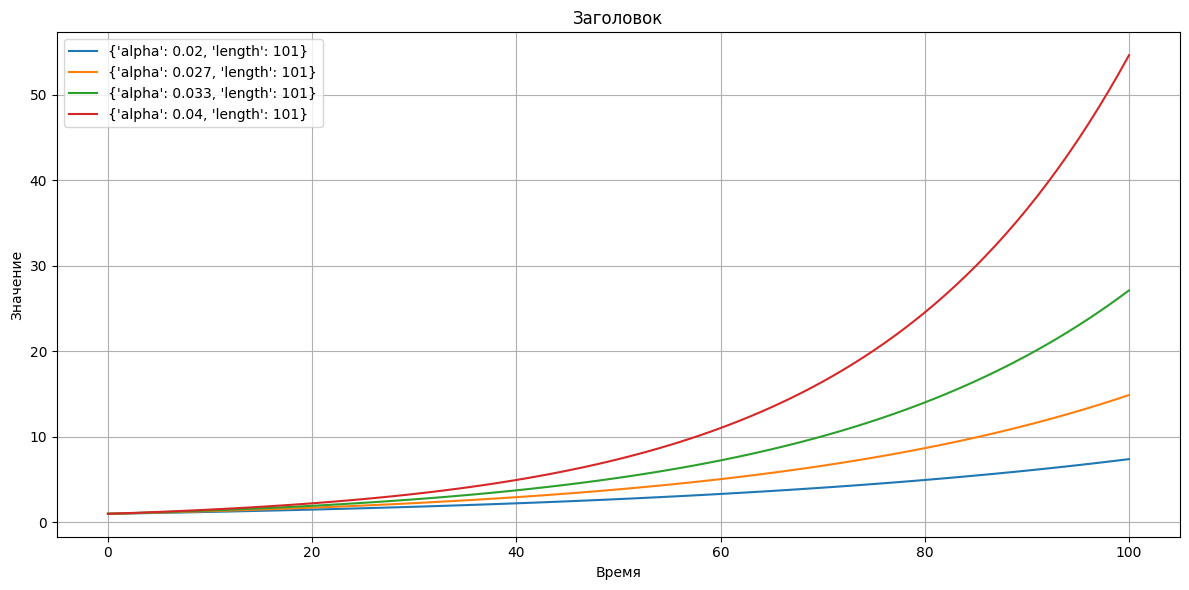

In [39]:
gen_func = TS_generator(exponential_trend, 'configs/trends/basic_exponential_trend.yaml')

gen_func.config['alpha_q'] = 4

series, params = gen_func.generate(all_values=True)
plot_series(series, labels=params)

## Sin wave

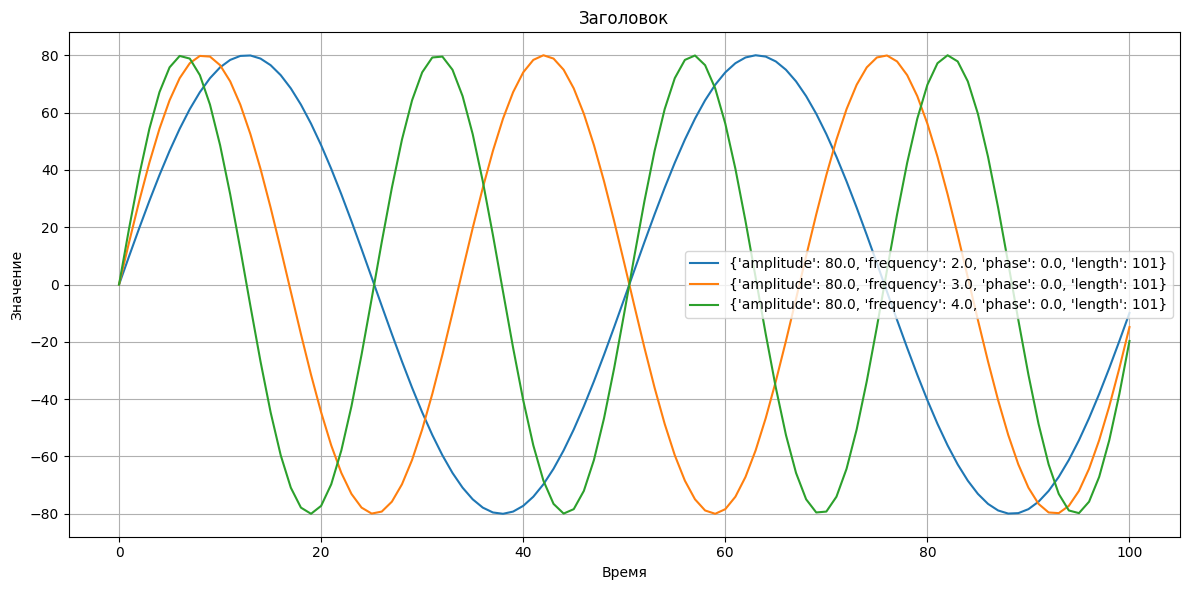

In [41]:
gen_func = TS_generator(sin_wave, 'configs/seasonality/basic_sin_wave.yaml')

gen_func.config['frequency_q'] = 3

series, params = gen_func.generate(all_values=True)
plot_series(series, labels=params)

## Sawtooth wave

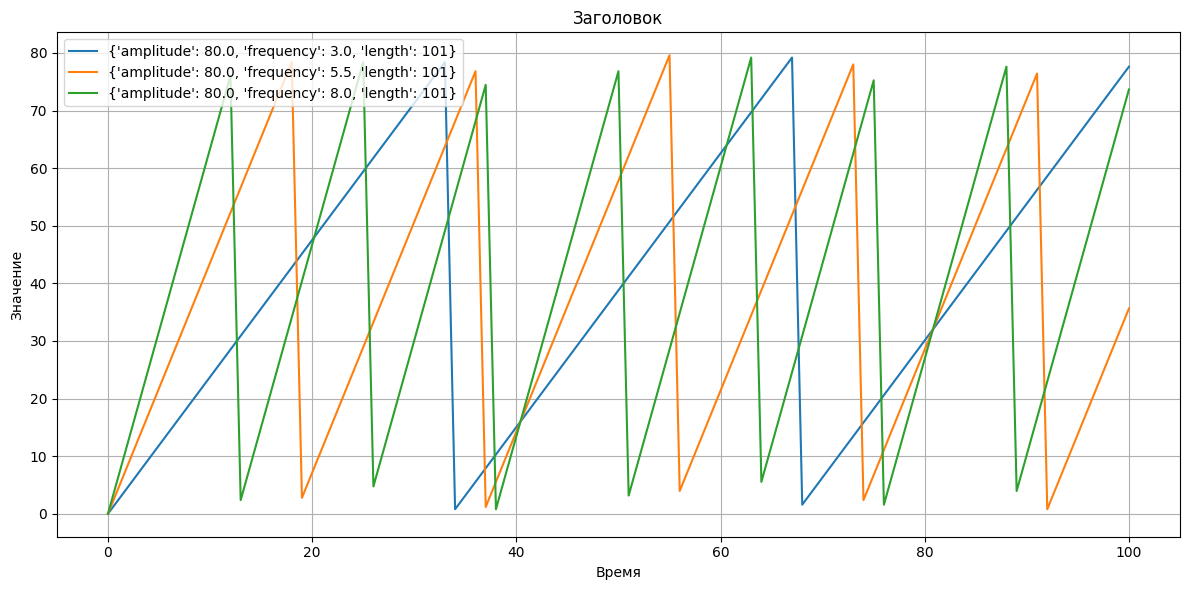

In [42]:
gen_func = TS_generator(sawtooth_wave, 'configs/seasonality/basic_saw_wave.yaml')

gen_func.config['frequency_q'] = 3 

series, params = gen_func.generate(all_values=True)
plot_series(series, labels=params)

## Harmonic oscillator (shifts)

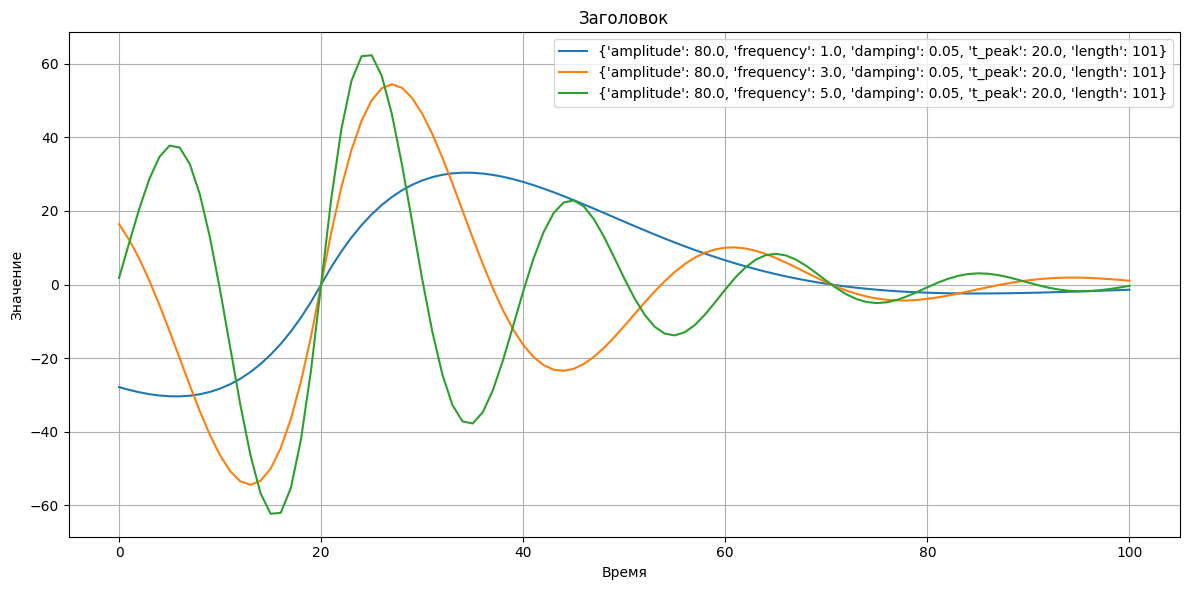

In [46]:
gen_func = TS_generator(harmonic_oscillator, 'configs/shifts/basic_harmonic_shift.yaml')

gen_func.config['frequency_q'] = 3 
gen_func.config['damping_d'] = 0.05
gen_func.config['t_peak_d'] = 20

series, params = gen_func.generate(all_values=True)
plot_series(series, labels=params)

## Sawtooth shift

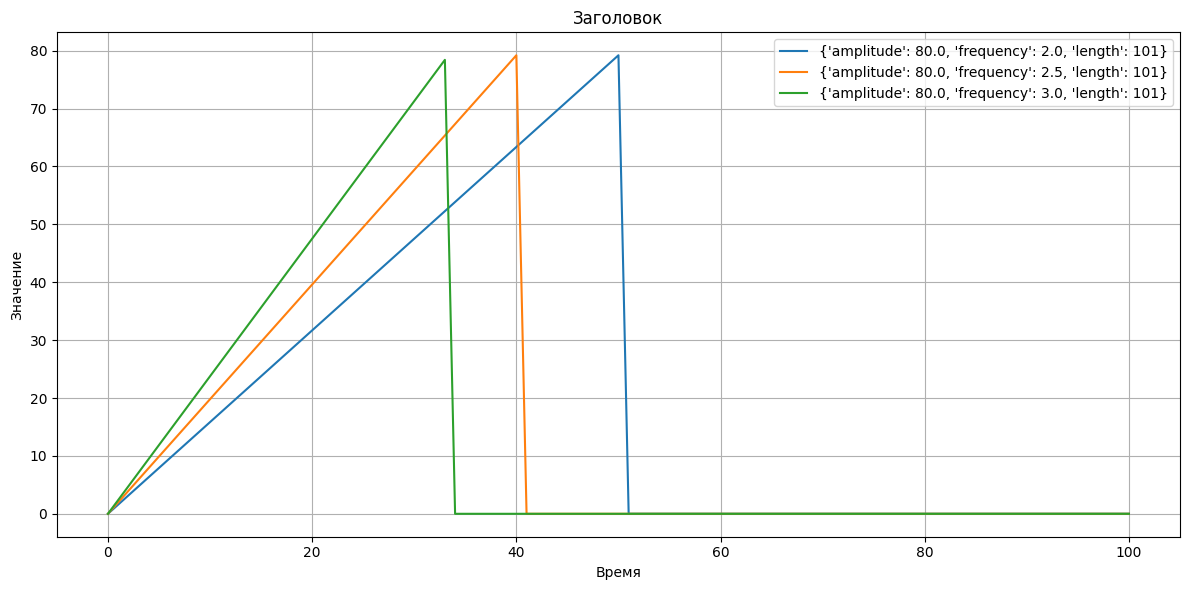

In [47]:
gen_func = TS_generator(sawtooth_shift, 'configs/shifts/basic_sawtooth_shift.yaml')

gen_func.config['frequency_q'] = 3 

series, params = gen_func.generate(all_values=True)
plot_series(series, labels=params)

## Random walk

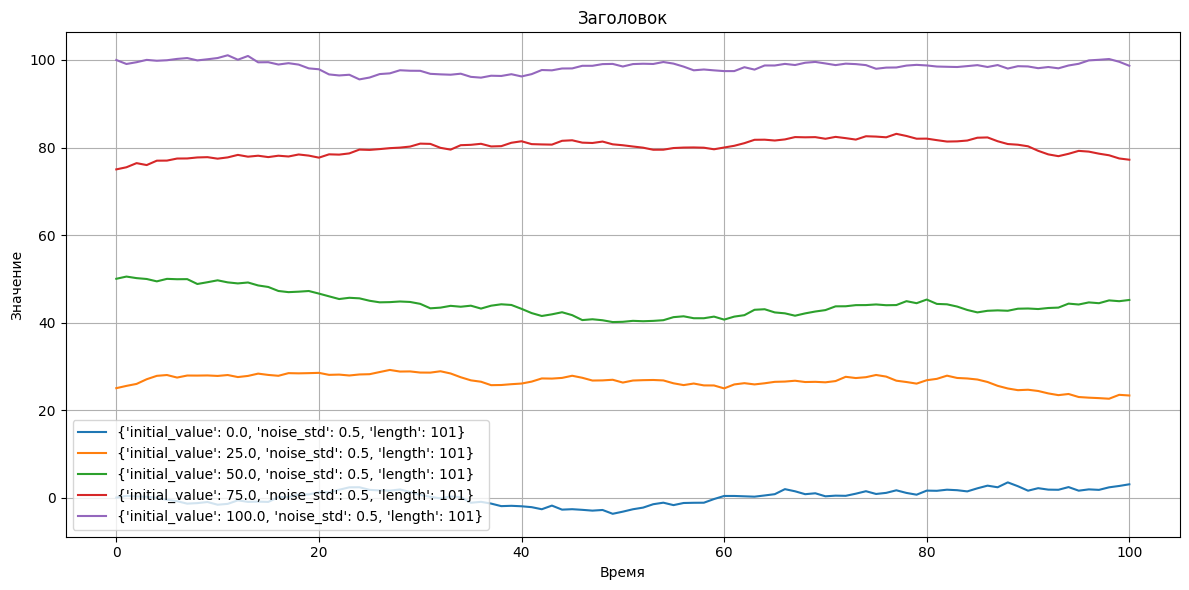

In [57]:
gen_func = TS_generator(random_walk, 'configs/noise/basic_random_walk.yaml')
gen_func.generate_params()

gen_func.config['initial_value_q'] = 5  

series, params = gen_func.generate(all_values=True)
plot_series(series, labels=params)

# Sandbox

## Реализация сетки

In [43]:
# def generate_clusters()

# params тут
# масштаб тут
# длина тут
clusters_num = 2
step = 0.05
sample_q = 100
trend_config = 'configs/trends/linear_trend2_101.yaml'


trend_gen = TS_generator(linear_trend, trend_config)

grid = np.linspace(trend_gen.config['slope_d'], trend_gen.config['slope_u'], clusters_num)

X_train = []
lbls = []

for inx, item in enumerate(grid):
    print(inx, item)
    trend_gen.config['slope_d'] = item - step
    trend_gen.config['slope_u'] = item + step
    trend_gen.config['slope_q'] = 1
    
    sample = trend_gen.generate()[0]
    noise = Noise_generator(sample, normal_noise, 'configs/noise/normal_05.yaml')
    
    for _ in range(int(sample_q/clusters_num)):
        cl1 = TS_merger()
        block1 = TS_block(trend=trend_gen, noise=noise)
        cl1.add_block(block1)

        X_train.append(cl1.generate())
         
    lbls += [inx+1] * int(sample_q/clusters_num)

X_train = np.array(X_train)
lbls = np.array(lbls)

print(X_train.shape, lbls.shape)


# series['cluster9']
# plot_series([np.mean(series['cluster9'], axis=0), np.mean(series['cluster10'], axis=0)], 'Average cluster 9') 
# print(len(lbls))

0 0.01
1 0.1
(100, 100) (100,)


In [38]:
X, y = generate_dataset(
    n_samples=100,
    length=101,
    scale_range=(0, 1),
    noise_level=0,
    structural_shift=False,
    clusters_num=4,
    seed=42,
    step=0
)

print("Форма X:", X.shape)  # (100, 100)
print("Форма y:", y.shape)  # (100,)
print("Уникальные метки:", np.unique(y, return_counts=True))

[0.01 0.04 0.07 0.1 ]
Кластер 1, наклон тренда: 0.01
Кластер 2, наклон тренда: 0.04
Кластер 3, наклон тренда: 0.07
Кластер 4, наклон тренда: 0.10
Форма X: (100, 100)
Форма y: (100,)
Уникальные метки: (array([0, 1, 2, 3]), array([25, 25, 25, 25], dtype=int64))


0 0.01
1 0.01888888888888889
2 0.027777777777777776
3 0.03666666666666667
4 0.04555555555555556
5 0.05444444444444445
6 0.06333333333333332
7 0.07222222222222222
8 0.0811111111111111
9 0.09


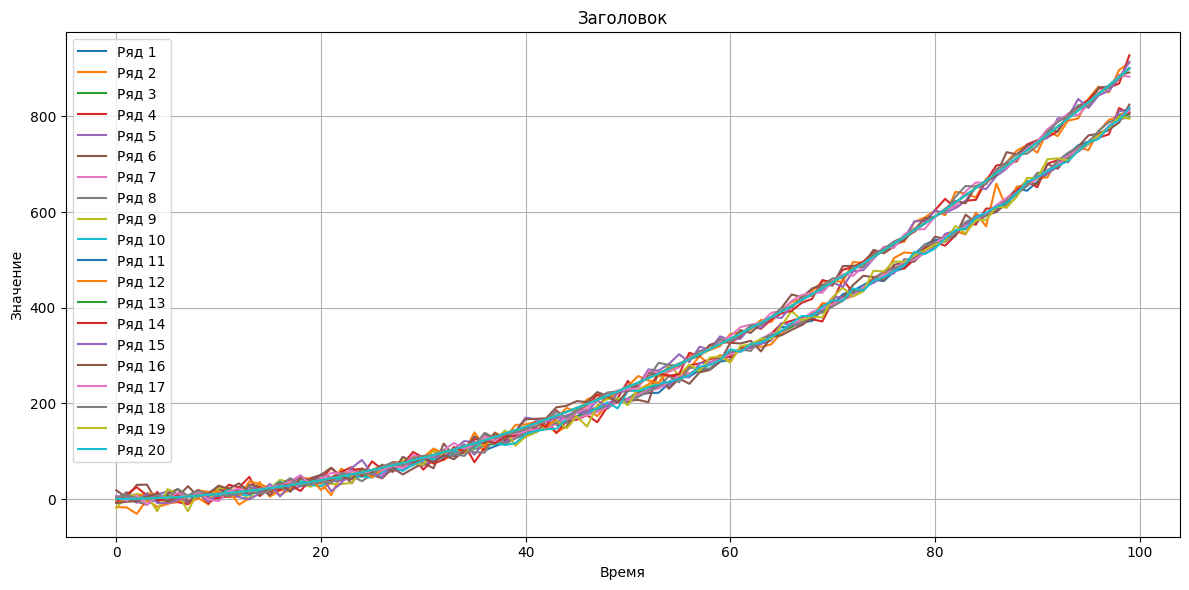

100


In [82]:
# def generate_clusters()

# params тут
# масштаб тут
# длина тут
clusters_num = 10
step = 0
sample_q = 100
trend_config = 'configs/trends/quadratic1_101.yaml'


trend_gen = TS_generator(quadratic_trend, trend_config)

grid = np.linspace(trend_gen.config['a_d'], trend_gen.config['a_u'], clusters_num)

series = {}
lbls = []

for inx, item in enumerate(grid):
    print(inx, item)
    trend_gen.config['a_d'] = item - step
    trend_gen.config['a_u'] = item + step
    trend_gen.config['a_q'] = 1
    
    sample = trend_gen.generate()[0]
    noise = Noise_generator(sample, normal_noise, 'configs/noise/normal_05.yaml')

    rows = []      
    for _ in range(int(sample_q/clusters_num)):
        cl1 = TS_merger()
        block1 = TS_block(trend=trend_gen, noise=noise)
        cl1.add_block(block1)

        rows.append(cl1.generate())

    series[f"cluster{inx+1}"] = [row for row in rows] # [acf(row, nlags=20) for row in rows]
    lbls += [inx+1] * int(sample_q/clusters_num)

plot_series(series['cluster9'] + series['cluster10']) 
print(len(lbls))

0 0.03
1 0.034444444444444444
2 0.03888888888888889
3 0.043333333333333335
4 0.04777777777777778
5 0.052222222222222225
6 0.05666666666666667
7 0.061111111111111116
8 0.06555555555555556
9 0.07


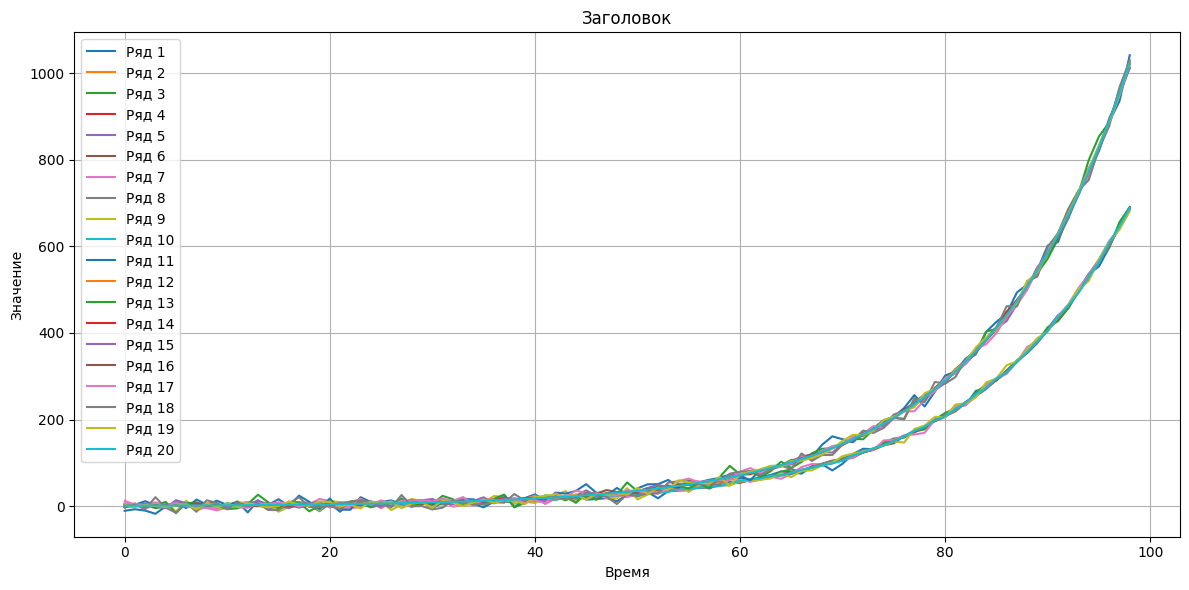

100


In [40]:
# def generate_clusters()

# params тут
# масштаб тут
# длина тут
clusters_num = 2
step = 0.01
sample_q = 100
trend_config = 'configs/trends/exponential1_101.yaml'


trend_gen = TS_generator(exponential_trend, trend_config)

grid = np.linspace(trend_gen.config['alpha_d'], trend_gen.config['alpha_u'], clusters_num)

series = {}
lbls = []

for inx, item in enumerate(grid):
    print(inx, item)
    trend_gen.config['alpha_d'] = item - step
    trend_gen.config['alpha_u'] = item + step
    trend_gen.config['alpha_q'] = 1
    
    sample = trend_gen.generate()[0]
    noise = Noise_generator(sample, normal_noise, 'configs/noise/normal_05.yaml')

    rows = []      
    for _ in range(int(sample_q/clusters_num)):
        cl1 = TS_merger()
        block1 = TS_block(trend=trend_gen, noise=noise)
        cl1.add_block(block1)

        rows.append(cl1.generate())

    series[f"cluster{inx+1}"] = [row for row in rows] # [acf(row, nlags=20) for row in rows]
    lbls += [inx+1] * int(sample_q/clusters_num)

plot_series(series['cluster9'] + series['cluster10']) 
print(len(lbls))

In [101]:
from sklearn.cluster import KMeans
import numpy as np
import random

X_train = series['cluster8'][:8] + series['cluster9'][:8] + series['cluster10'][:8]
random.shuffle(X_train)

kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(X_train)

X_test = series['cluster8'][8:] + series['cluster9'][8:] + series['cluster10'][8:]
pred_lbls = kmeans.predict(X_test)

pred_lbls

# from sklearn.cluster import KMeans
# import numpy as np
# import random

# X_train = series['cluster1'][:8] + series['cluster2'][:8] + series['cluster3'][:8] + series['cluster4'][:8] + series['cluster5'][:8] + series['cluster6'][:8] + series['cluster7'][:8] + series['cluster8'][:8] + series['cluster9'][:8] + series['cluster10'][:8]
# random.shuffle(X_train)

# kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(X_train)


# pred_lbls = kmeans.predict(series['cluster1'][8:] + series['cluster2'][8:] + series['cluster3'][8:] + series['cluster4'][8:] + series['cluster5'][8:] + series['cluster6'][8:] + series['cluster7'][8:] + series['cluster8'][8:] + series['cluster9'][8:] + series['cluster10'][8:])

# pred_lbls

array([1, 1, 2, 2, 3, 3])

In [103]:
from src.clustering.partitioning_clustering import Sklearn_kmeans_model

model = Sklearn_kmeans_model()
y_pred = model.fit_predict(X_train, X_test)
y_pred

(array([2, 2, 0, 0, 3, 3]), KMeans(n_init=10))

In [106]:
len(X_train), X_train[0].shape


(24, (99,))

In [30]:
rows = []
sample_number = 10000

ts_gen = TS_merger()
block1 = TS_block(trend=lin_gen)
ts_gen.add_block(block1)

for i in range(sample_number):
    rows.append(ts_gen.generate())

len(rows)

10000

In [ ]:
import numpy as np
from src.ts_creation import TS_generator, Noise_generator, TS_block, TS_merger
from src.ts_generators import linear_trend, sin_wave, harmonic_oscillator, sawtooth_shift, random_walk
from src.ts_noise_generators import normal_noise
from pathlib import Path
import yaml


class TSClusterGenerator:
    def __init__(self, base_config=None):
        self.base_config = base_config or {}

    def generate_cluster_params(self, gen_func_name: str, num_clusters: int):
        """
        Генерирует параметры для каждого кластера.
        """
        if gen_func_name == 'linear_trend':
            return [{'slope': s} for s in np.linspace(0.1, 1.5, num_clusters)]  # Увеличен диапазон
        elif gen_func_name == 'sin_wave':
            # Фиксируем frequency, меняем amplitude
            return [{'amplitude': a, 'frequency': 2.0} for a in np.linspace(0.5, 5.0, num_clusters)]  # Увеличен диапазон
        elif gen_func_name == 'harmonic_oscillator':
            return [{'amplitude': a, 'damping': 0.05, 't_peak': 20} for a in np.linspace(5, 20, num_clusters)]
        elif gen_func_name == 'sawtooth_shift':
            return [{'amplitude': a} for a in np.linspace(0.5, 5.0, num_clusters)]  # Увеличен диапазон
        elif gen_func_name == 'random_walk':
            return [{'initial_value': iv} for iv in np.linspace(-1.0, 1.0, num_clusters)]
        else:
            raise ValueError(f"Unknown generator function: {gen_func_name}")

    def scale_series(self, series: np.ndarray, scale_range=(0, 1)):
        """Нормализует и масштабирует временной ряд"""
        series_min, series_max = series.min(), series.max()
        scaled = (series - series_min) / (series_max - series_min + 1e-8)
        scaled *= (scale_range[1] - scale_range[0])
        scaled += scale_range[0]
        return scaled

    def generate_dataset(
        self,
        gen_func_name: str,
        num_clusters: int,
        sample_size: int,
        length: int,
        scales: list,
        noise_levels: list,
        save_path: str = "data/clusters",
        seed: int = 42
    ):
        """
        Генерирует датасет из временных рядов, разбитых на кластеры.
        """
        np.random.seed(seed)

        save_dir = Path(save_path)
        save_dir.mkdir(parents=True, exist_ok=True)

        gen_map = {
            'linear_trend': linear_trend,
            'sin_wave': sin_wave,
            'harmonic_oscillator': harmonic_oscillator,
            'sawtooth_shift': sawtooth_shift,
            'random_walk': random_walk
        }

        cluster_params = self.generate_cluster_params(gen_func_name, num_clusters)
        samples_per_cluster = sample_size // num_clusters

        X = []
        y = []
        configs = []

        for cluster_id, params in enumerate(cluster_params):
            for _ in range(samples_per_cluster):
                ts_gen = TS_generator(gen_map[gen_func_name], config={'length': length, **params})
                ts_data, ts_config = ts_gen.generate()

                # Масштабируем
                scale = scales[np.random.choice(len(scales))]
                ts_scaled = self.scale_series(ts_data, scale)

                # Добавляем шум
                noise_pct = noise_levels[np.random.choice(len(noise_levels))]
                noise_gen = Noise_generator(ts_scaled, normal_noise, config={"noise_pct": noise_pct})
                ts_noisy, noise_config = noise_gen.generate()

                # Сохраняем
                X.append(ts_noisy)
                y.append(cluster_id)
                full_config = {
                    "cluster_id": cluster_id,
                    "generator": gen_func_name,
                    "ts_config": ts_config,
                    "noise_config": noise_config,
                    "scale": scale,
                    "length": length,
                    "noise_level": noise_pct
                }
                configs.append(full_config)

        # Сохранение данных
        data_file = save_dir / f"{gen_func_name}_dataset.npy"
        labels_file = save_dir / f"{gen_func_name}_labels.npy"
        config_file = save_dir / f"{gen_func_name}_configs.yaml"

        np.save(data_file, np.array(X))
        np.save(labels_file, np.array(y))

        with open(config_file, 'w') as f:
            yaml.dump_all(configs, f, default_flow_style=False)

        print(f"Generated dataset: {len(X)} samples across {num_clusters} clusters.")
        print(f"Saved to {save_dir}/")
        return data_file, labels_file, config_file

In [56]:
cluster_gen = TSClusterGenerator()

# Уменьшаем уровень шума
noise_levels = [0.0]

# Увеличиваем диапазон масштабирования
scales = [[0, 1], [100, 800]]

cluster_gen.generate_dataset(
    gen_func_name='sin_wave',
    num_clusters=3,
    sample_size=60,
    length=101,
    scales=scales,
    noise_levels=noise_levels,
    save_path="data/sin_clusters"
)

Generated dataset: 60 samples across 3 clusters.
Saved to data\sin_clusters/


(WindowsPath('data/sin_clusters/sin_wave_dataset.npy'),
 WindowsPath('data/sin_clusters/sin_wave_labels.npy'),
 WindowsPath('data/sin_clusters/sin_wave_configs.yaml'))

In [57]:
data = np.load('data/sin_clusters/sin_wave_dataset.npy')
data.shape

(60, 101)

In [58]:
lbls = np.load('data/sin_clusters/sin_wave_labels.npy')
lbls.shape, lbls

((60,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

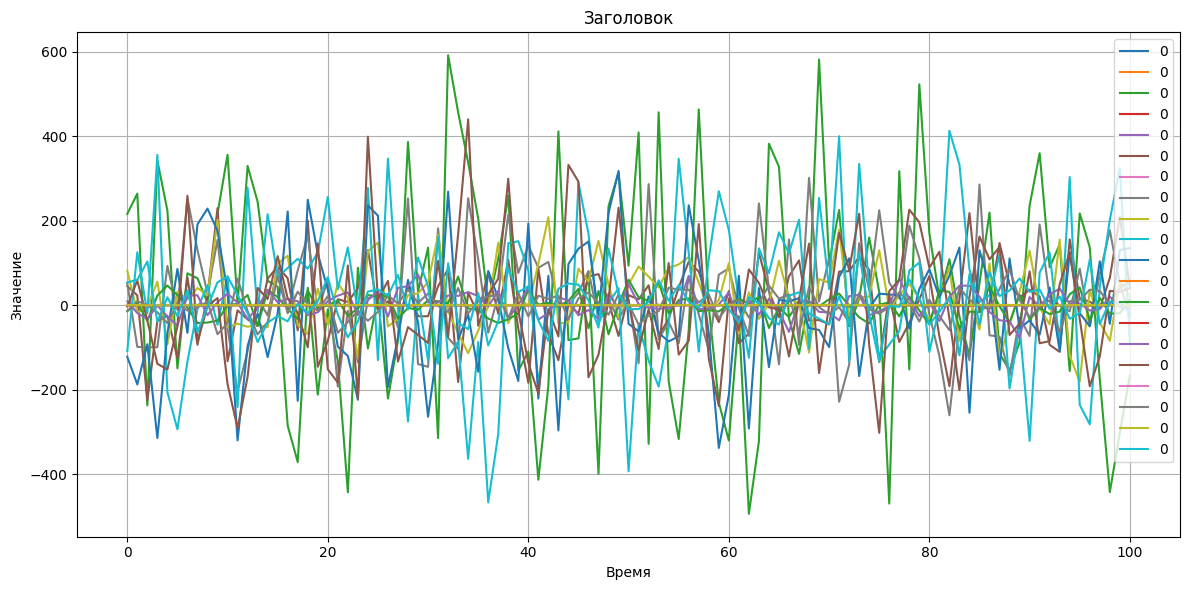

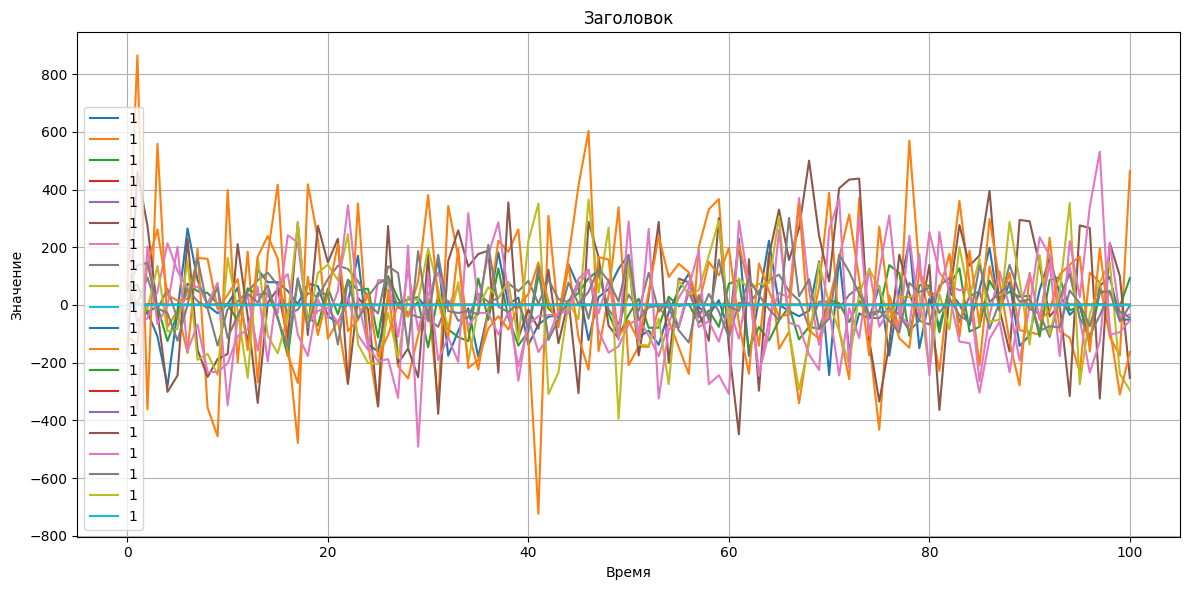

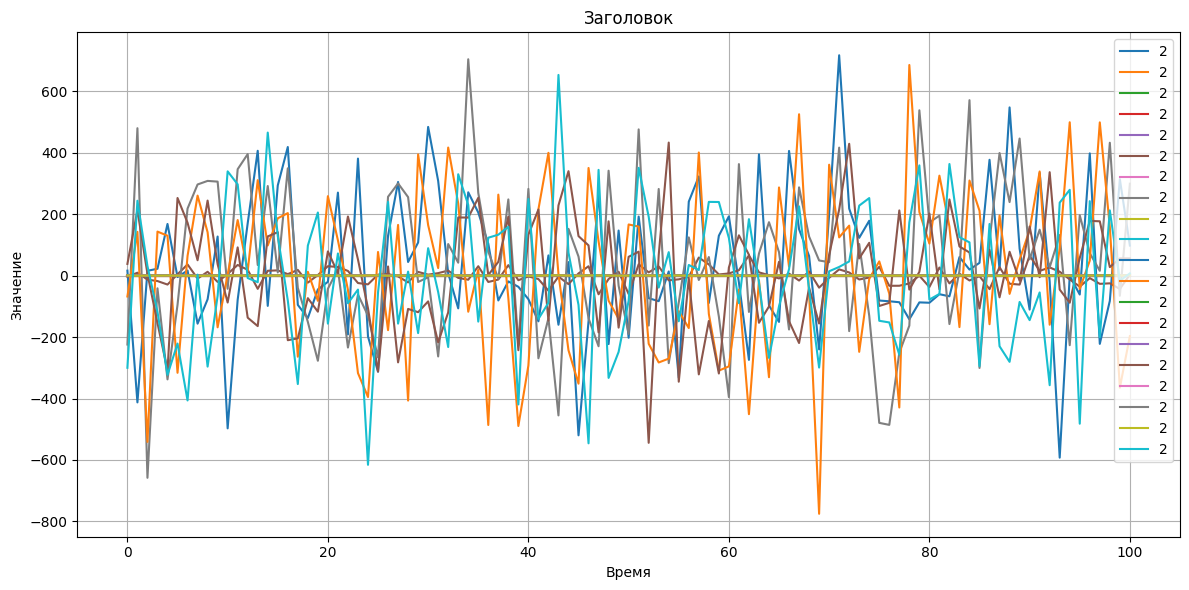

In [59]:
plot_series(data[:20].T, labels=lbls[:20].tolist())
plot_series(data[20:40].T, labels=lbls[20:40].tolist())
plot_series(data[40:].T, labels=lbls[40:].tolist())